In [28]:
# notebook for new ircc dataset (combined_event_log_anonymous.csv)

# TODO XD

# also try "timestamp differences" on abstracted log
# try the pm4py.filter_between & focus just on candidate & integrated search stuff
# everything can just occur in any order, it seems ...

In [29]:
import pm4py
import pandas as pd
import numpy as np

# pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 200

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Preprocess logs

## Variant analysis

In [ ]:
# huge amount of variability

# or log: # traces = 7734, # vars = 7665, ratio = 99.10783553141971

# abstr log new: # traces = 7734, # vars = 5145, ratio = 66.5244375484872
# abstr log or: # traces = 7734, # vars = 2642, ratio = 34.16084820274114

# or log (filter evts in less than X of cases): 
#   1%: 7664 variants: we lose 1 variant XD
#   10%: 7657 variants: we lose 8 variants
# or log (same time for events within 1min):
#   6030 variants: we lose 1635 variants
#   + above: 5841 variants: we lose 1824 variants

In [92]:
import pandas as pd
from variant_stats import get_variants_stats, get_variant_ratio, get_variant_coverage, get_covering_variants, filter_traces_on_variants

In [196]:
# log = pd.read_csv("data/combined_event_log-filter_evt10p.csv")
log = pd.read_csv("data/combined_event_log-filter_evt10p-time1m.csv")
vars_log = get_variants_stats(log)
vars_log

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_3819/236426000.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("data/combined_event_log-filter_evt10p-time1m.csv")


,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",42,0.543057,0.543057,0.017120
1,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",36,0.465477,1.008534,0.034241
2,"(Application Status - Prospective, Biometric Assessment - Required, Biometrics - RCMP - Not Started, Biometrics Fee - Outstanding, Biometrics Fee - Outstanding, Biometrics Fee - Paid, Biometrics F...",36,0.465477,1.474011,0.051361
3,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",27,0.349108,1.823119,0.068481
4,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",25,0.323248,2.146367,0.085602
...,...,...,...,...,...
5836,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",1,0.012930,99.948280,99.931519
5837,"(Application Status - Prospective, Biometric Assessment - Required, Biometrics - RCMP - Not Started, Biometrics Fee - Outstanding, Biometrics Fee - Outstanding, Biometrics Fee - Paid, Biometrics F...",1,0.012930,99.961210,99.948639
5838,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",1,0.012930,99.974140,99.965759
5839,"(Application Status - Open, Application Status - Prospective, Auto Promote - In Progress, Auto Promote - Not Started, Auto Promote - Submit, Auto Promote - Successful, Auto Promote Decision - In P...",1,0.012930,99.987070,99.982880


In [32]:
log = pd.read_csv("data/combined_event_log_anonymous.csv")
log['act_upd_date'] = pd.to_datetime(log['act_upd_date'])
log = log.rename({ 'app_num': 'case:concept:name', 'activity_full_value': 'concept:name', 'act_upd_date': 'time:timestamp' }, axis=1)

abstr_log_or = pd.read_csv("data/or/abstract_log-starts_ends-v2.csv")
abstr_log_new = pd.read_csv("data/combined_event_log-abstracted2.csv")

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_3819/4142036920.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("data/combined_event_log_anonymous.csv")


In [33]:
print("total # traces:", len(log['case:concept:name'].unique()))

vars_log = get_variants_stats(log)
vars_abstr_log_or = get_variants_stats(abstr_log_or)
vars_abstr_log_new = get_variants_stats(abstr_log_new)

print("log:", get_variant_ratio(log, vars_log))
print("abstr log or:", get_variant_ratio(log, vars_abstr_log_or))
print("abstr log new:", get_variant_ratio(log, vars_abstr_log_new))

total # traces: 7734
log: # traces = 7734, # vars = 7665, ratio = 99.11
abstr log or: # traces = 7734, # vars = 2642, ratio = 34.16
abstr log new: # traces = 7734, # vars = 5145, ratio = 66.52


In [34]:
vars_log

,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",4,0.05172,0.051720,0.013046
1,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",3,0.03879,0.090509,0.026093
2,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",3,0.03879,0.129299,0.039139
3,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",3,0.03879,0.168089,0.052185
4,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Exempt - Age, Study Permit Fee - Outstandi...",3,0.03879,0.206879,0.065232
...,...,...,...,...,...
7660,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",1,0.01293,99.948280,99.947815
7661,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",1,0.01293,99.961210,99.960861
7662,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",1,0.01293,99.974140,99.973907
7663,"(Application Status - Prospective, Misrepresentation - NIL, Eligibility Assessment - NIL, Final Assessment - NIL, Received - Date, Biometric Assessment - Required, Criminality - Not Started, Crimi...",1,0.01293,99.987070,99.986954


In [35]:
len(log['case:concept:name'].unique())

# 7734 traces vs. 7665 variants XD
# a variant covers at most 4 traces ...

7734

## Infrequent events

In [ ]:
# log = pd.read_csv("data/combined_event_log-abstracted2.csv")

log = pd.read_csv("data/combined_event_log_anonymous.csv")
log = log.rename({ 'app_num': 'case:concept:name', 'activity_full_value': 'concept:name' }, axis=1)

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_3819/3293440336.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("data/combined_event_log_anonymous.csv")


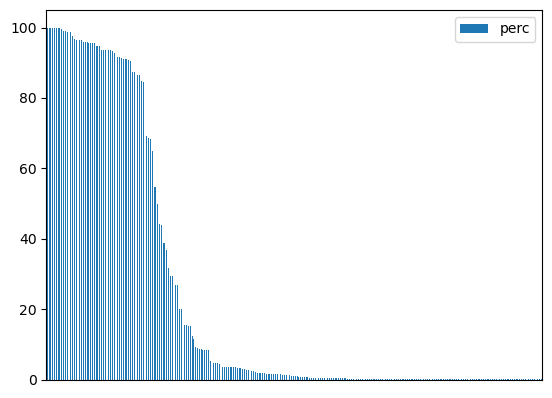

In [161]:
from log_stats import count_cases_per_event

activ_cases_counts = count_cases_per_event('concept:name', 'case:concept:name', log).reset_index()

In [162]:
activ_cases_counts[activ_cases_counts['perc']<10]

,concept:name,cases,perc
82,Medical - In Progress,708,9.154383
83,Medical Assessment - In Progress,688,8.895785
84,Medical Assessment - Sent,681,8.805275
85,Medical - Sent,681,8.805275
86,Biometric - FCC - NZ - Not Started,651,8.417378
...,...,...,...
269,Non-compliance - Passed,1,0.012930
270,Note Review - Review Complete,1,0.012930
271,Open Work Permit Holder Fee Fee - Outstanding,1,0.012930
272,Other Reqs Assessment - Failed,1,0.012930


In [163]:
# let's filter on activities that occur in 10% or less of cases
to_drop = activ_cases_counts.loc[activ_cases_counts['perc']<10, 'concept:name']
log_filter = log[~ log['concept:name'].isin(to_drop)]

In [164]:
log_filter.to_csv("data/combined_event_log-filter_evt10p.csv")

## Duplicate events

## Timestamp differences

In [182]:
# log = pd.read_csv("data/combined_event_log_anonymous.csv")
log = pd.read_csv("data/combined_event_log-filter_evt10p.csv")

log = log.rename({ 'app_num': 'case:concept:name', 'activity_full_value': 'concept:name', 'act_upd_date': 'time:timestamp' }, axis=1)
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_3819/3879851213.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("data/combined_event_log-filter_evt10p.csv")


In [183]:
log = log.sort_values(by=['case:concept:name', 'time:timestamp', 'concept:name'])
log = log.reset_index().drop('index', axis=1)
log = log.reset_index()
log

,index,Unnamed: 0,case:concept:name,time:timestamp,act_upd_by,activity_id,group,activity,activity_status,cor,citz,concept:name
0,0,0,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Application Status,Prospective,Vietnam,Vietnam,Application Status - Prospective
1,1,2,0,2024-06-03 09:20:37.327,1,0,NaN,Eligibility Assessment,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL
2,2,3,0,2024-06-03 09:20:37.327,1,0,NaN,Final Assessment,NIL,Vietnam,Vietnam,Final Assessment - NIL
3,3,1,0,2024-06-03 09:20:37.327,1,0,NaN,Misrepresentation,NIL,Vietnam,Vietnam,Misrepresentation - NIL
4,4,4,0,2024-06-03 09:20:37.327,1,0,NaN,Received,Date,Vietnam,Vietnam,Received - Date
...,...,...,...,...,...,...,...,...,...,...,...,...
525681,525681,543298,7733,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,Other Reqs Assessment,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL
525682,525682,543299,7733,2024-06-26 08:11:25.043,281,1-STC2A6X,NaN,Eligibility Assessment,Review Required,Belgium,Cameroon,Eligibility Assessment - Review Required
525683,525683,543300,7733,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Eligibility Assessment,Failed,Belgium,Cameroon,Eligibility Assessment - Failed
525684,525684,543301,7733,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Final Assessment,Refused,Belgium,Cameroon,Final Assessment - Refused


In [184]:
# silly willy!
ex1 = pd.Series([1, 2, 3])
ex2 = pd.Series([   1, 3, 3])

ex1 - ex2.shift(1)

0    NaN
1    1.0
2    0.0
dtype: float64

In [185]:
cases_firsts = log.groupby('case:concept:name').first().reset_index()
cases_firsts

,case:concept:name,index,Unnamed: 0,time:timestamp,act_upd_by,activity_id,group,activity,activity_status,cor,citz,concept:name
0,0,0,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,None,Application Status,Prospective,Vietnam,Vietnam,Application Status - Prospective
1,1,71,79,2024-06-03 09:20:49.697,0,1-SQ1QND3,None,Application Status,Prospective,Taiwan,Taiwan,Application Status - Prospective
2,2,127,138,2024-06-03 09:20:52.143,0,1-SQ1RUIF,1-SQ1QTAC,Application Status,Prospective,Mexico,Mexico,Application Status - Prospective
3,3,196,209,2024-06-03 09:23:05.530,0,1-SQ1TB1J,None,Application Status,Prospective,Japan,Japan,Application Status - Prospective
4,4,253,268,2024-06-03 09:23:36.900,0,1-SQ1TO6V,None,Application Status,Prospective,"Korea, South","Korea, South",Application Status - Prospective
...,...,...,...,...,...,...,...,...,...,...,...,...
7729,7729,525341,542952,2024-06-06 09:54:37.373,1092,1-STC2Z9T,None,Application Status,Prospective,France,France,Application Status - Prospective
7730,7730,525408,543019,2024-06-06 09:56:36.187,1092,1-STCAXUQ,2000001653925.0,Application Status,Prospective,China,China,Application Status - Prospective
7731,7731,525479,543094,2024-06-06 09:57:34.280,1092,1-STC29YF,None,Application Status,Prospective,Nigeria,Nigeria,Application Status - Prospective
7732,7732,525555,543170,2024-06-06 10:07:26.317,1092,1-STC5NDI,None,Application Status,Prospective,France,France,Application Status - Prospective


In [186]:
log['time_diff']= log['time:timestamp'] - log['time:timestamp'].shift(1)
log['time_diff'] = log['time_diff'].apply(pd.Timedelta.total_seconds)
log['time_diff']

0                NaN
1              0.000
2              0.000
3              0.000
4              0.000
             ...    
525681         0.236
525682    779085.610
525683    182024.007
525684         0.537
525685        14.960
Name: time_diff, Length: 525686, dtype: float64

In [187]:
# irrelevant time differences for first events of cases

log['time_diff'].loc[cases_firsts['index']] = 1_000_000
log[log['time_diff']==1_000_000].shape[0] # sanity check

7734

In [188]:
log[log['case:concept:name']==0].head(40)

,index,Unnamed: 0,case:concept:name,time:timestamp,act_upd_by,activity_id,group,activity,activity_status,cor,citz,concept:name,time_diff
0,0,0,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Application Status,Prospective,Vietnam,Vietnam,Application Status - Prospective,1000000.000
1,1,2,0,2024-06-03 09:20:37.327,1,0,NaN,Eligibility Assessment,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL,0.000
2,2,3,0,2024-06-03 09:20:37.327,1,0,NaN,Final Assessment,NIL,Vietnam,Vietnam,Final Assessment - NIL,0.000
3,3,1,0,2024-06-03 09:20:37.327,1,0,NaN,Misrepresentation,NIL,Vietnam,Vietnam,Misrepresentation - NIL,0.000
4,4,4,0,2024-06-03 09:20:37.327,1,0,NaN,Received,Date,Vietnam,Vietnam,Received - Date,0.000
5,5,5,0,2024-06-03 09:20:38.890,2,1-SQ1RI5F,NaN,Biometric Assessment,Required,Vietnam,Vietnam,Biometric Assessment - Required,1.563
6,6,6,0,2024-06-03 09:20:39.023,3,1-SQ1RI7P,NaN,Criminality,Not Started,Vietnam,Vietnam,Criminality - Not Started,0.133
7,7,7,0,2024-06-03 09:20:39.160,2,1-SQ1RI5F,NaN,Criminality Assessment,Not Started,Vietnam,Vietnam,Criminality Assessment - Not Started,0.137
8,8,8,0,2024-06-03 09:20:39.400,3,1-SQ1RI7P,NaN,Criminality,In Progress,Vietnam,Vietnam,Criminality - In Progress,0.240
9,9,9,0,2024-06-03 09:20:39.530,2,1-SQ1RI5F,NaN,Criminality Assessment,In Progress,Vietnam,Vietnam,Criminality Assessment - In Progress,0.130


In [189]:
# (check all sequential events with exact same timestamp)

num_simult = len(log[log['time_diff']==0])
total_num = log.shape[0]

print("num simult (0 sec):", num_simult, " <> total num:", total_num)

num simult (0 sec): 191457  <> total num: 525686


In [190]:
# (check all sequential events with less than 1min difference in timestamps)

num_simult = len(log[log['time_diff'] < 60 * 10])
total_num = log.shape[0]

print("num simult (1 min):", num_simult, " <> total num:", total_num)

num simult (1 min): 467345  <> total num: 525686


In [191]:
# set time_diff2 to 0 if time_diff is less than 60

log['time_diff2'] = log['time_diff']
log.loc[log['time_diff2'] < 60, 'time_diff2'] = 0

In [192]:
# START interval solution

# re-use prior timestamps for rows where difference was negligible (time_diff2 == 0)

# get all rows where time difference was not negligible
intervals = log[log['time_diff2'] > 0][['index', 'time:timestamp']]
# these rows' timestamps will apply to all subsequent rows where time_diff2 == 0
# (so, until the next row in this df)
intervals['from'] = intervals['index']
intervals['to'] = intervals['index'].shift(-1)
 # set last "to" to max value of index
intervals.iloc[-1, 3] = log['index'].max() + 1 # (to get an inclusive interval of max)
intervals

,index,time:timestamp,from,to
0,0,2024-06-03 09:20:37.327,0,33.0
33,33,2024-06-03 15:56:45.000,33,44.0
44,44,2024-06-03 16:33:09.557,44,54.0
54,54,2024-06-03 16:39:43.477,54,57.0
57,57,2024-06-14 07:14:27.657,57,59.0
...,...,...,...,...
525673,525673,2024-06-11 23:44:50.997,525673,525679.0
525679,525679,2024-06-11 23:52:27.260,525679,525680.0
525680,525680,2024-06-17 07:46:39.197,525680,525682.0
525682,525682,2024-06-26 08:11:25.043,525682,525683.0


In [193]:
# convert interval into lists with all relevant indexes
# (later, we can "explode" these into their own rows)

def gen_interval(row):
    if row.iloc[0] == row.iloc[1]:
        return [int(row.iloc[0])]
    else:
        return range(int(row.iloc[0]), int(row.iloc[1]))

intervals['list'] = intervals[['from', 'to']].apply(gen_interval, axis=1)
# use timestamp as index; we know they're unique at this point
# and we need them in the explode result
intervals = intervals.set_index(intervals['time:timestamp'])
intervals = intervals[['list']]
intervals

,list
time:timestamp,
2024-06-03 09:20:37.327,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32)"
2024-06-03 15:56:45.000,"(33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43)"
2024-06-03 16:33:09.557,"(44, 45, 46, 47, 48, 49, 50, 51, 52, 53)"
2024-06-03 16:39:43.477,"(54, 55, 56)"
2024-06-14 07:14:27.657,"(57, 58)"
...,...
2024-06-11 23:44:50.997,"(525673, 525674, 525675, 525676, 525677, 525678)"
2024-06-11 23:52:27.260,(525679)
2024-06-17 07:46:39.197,"(525680, 525681)"


In [194]:
# explode the interval lists into separate rows

# add timestamp index as separate column (reset index)
intervals = intervals['list'].explode().reset_index()
intervals = intervals.rename({'time:timestamp': 'time:timestamp2', 'list': 'index'}, axis=1)
intervals

,time:timestamp2,index
0,2024-06-03 09:20:37.327,0
1,2024-06-03 09:20:37.327,1
2,2024-06-03 09:20:37.327,2
3,2024-06-03 09:20:37.327,3
4,2024-06-03 09:20:37.327,4
...,...,...
525681,2024-06-17 07:46:39.197,525681
525682,2024-06-26 08:11:25.043,525682
525683,2024-06-28 10:45:09.050,525683
525684,2024-06-28 10:45:09.050,525684


In [195]:
# join log with intervals based on the index 
# (use left join; rows with time_diff > 0 will be N/A)
log2 = log.merge(intervals, left_on='index', right_on='index', how='left')
# simply copy the original timestamps for those cases
log2.loc[log2['time_diff2']>0, 'time:timestamp2'] = log2.loc[log2['time_diff2']>0, 'time:timestamp']
log2 = log2.sort_values(by=['case:concept:name', 'time:timestamp2', 'concept:name'])
log2.to_csv("data/combined_event_log-filter_evt10p-time1m.csv")

In [ ]:
# START loop-based solution
# (takes 3-4 minutes)

log['time:timestamp2'] = log['time:timestamp']

cur_ts = None
for idx, row in log.iterrows():
    if (idx % 1000 == 0):
        print(idx, round((idx / log.shape[0]) * 100, 2), "%")
    
    if row['time_diff2'] > 0: # always the case for the first row
         cur_ts = row['time:timestamp']
    
    else:
        log.loc[idx, 'time:timestamp2'] = cur_ts
        
log.to_csv("test_loop.csv")

0 0.0 %
1000 0.18 %
2000 0.37 %
3000 0.55 %
4000 0.74 %
5000 0.92 %
6000 1.1 %
7000 1.29 %
8000 1.47 %
9000 1.66 %
10000 1.84 %
11000 2.02 %
12000 2.21 %
13000 2.39 %
14000 2.58 %
15000 2.76 %
16000 2.94 %
17000 3.13 %
18000 3.31 %
19000 3.5 %
20000 3.68 %
21000 3.87 %
22000 4.05 %
23000 4.23 %
24000 4.42 %
25000 4.6 %
26000 4.79 %
27000 4.97 %
28000 5.15 %
29000 5.34 %
30000 5.52 %
31000 5.71 %
32000 5.89 %
33000 6.07 %
34000 6.26 %
35000 6.44 %
36000 6.63 %
37000 6.81 %
38000 6.99 %
39000 7.18 %
40000 7.36 %
41000 7.55 %
42000 7.73 %
43000 7.91 %
44000 8.1 %
45000 8.28 %
46000 8.47 %
47000 8.65 %
48000 8.83 %
49000 9.02 %
50000 9.2 %
51000 9.39 %
52000 9.57 %
53000 9.76 %
54000 9.94 %
55000 10.12 %
56000 10.31 %
57000 10.49 %
58000 10.68 %
59000 10.86 %
60000 11.04 %
61000 11.23 %
62000 11.41 %
63000 11.6 %
64000 11.78 %
65000 11.96 %
66000 12.15 %
67000 12.33 %
68000 12.52 %
69000 12.7 %
70000 12.88 %
71000 13.07 %
72000 13.25 %
73000 13.44 %
74000 13.62 %
75000 13.8 %
76000 13.99 %

In [91]:
# START compare two solutions

test_loop = pd.read_csv("test_loop.csv")
test_pd = pd.read_csv("test_pd.csv")

non_match = test_pd[test_pd['time:timestamp2'] != test_loop['time:timestamp2']]

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_3819/800541674.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_loop = pd.read_csv("test_loop.csv")
/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_3819/800541674.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_pd = pd.read_csv("test_pd.csv")


# Subprocesses

## Subprocesses based on status

In [ ]:
log = pd.read_csv("data/combined_event_log_anonymous.csv")
log = log.reset_index() #.rename({ 'index': 'or_index' }) (doesn't work)
log

In [ ]:
log = log.rename({ 'app_num': 'case:concept:name', 'act_upd_date': 'time:timestamp' }, axis=1)

In [ ]:
# get all unique activities
log['activity'].drop_duplicates().sort_values().to_excel("data/all_activities.xlsx")

In [ ]:
# get activity subprocesses
activ_lifecycles = log[['activity', 'activity_status']].drop_duplicates().sort_values(by=['activity'])
activ_lifecycles.to_excel("data/activity_lifecycles.xlsx")

In [ ]:
# count number of sub-activities in each subprocess
counts = log[['activity', 'activity_status']].drop_duplicates().groupby('activity')['activity_status'].count()
counts = counts.sort_values(ascending=False)
counts

In [ ]:
# only separate subprocesses with >= 3 sub-activities
parent_activ = counts[counts >= 3].reset_index()
parent_activ

In [ ]:
subproc_evts = log[log['activity'].isin(parent_activ['activity'])]
subproc_evts

In [ ]:
non_subproc_evts = log[~ log['activity'].isin(parent_activ['activity'])]
non_subproc_evts

### Create separate logs per subprocess

In [ ]:
from separ_subproc import separ_subproc

separ_subproc(subproc_evts, non_subproc_evts, 'activity', 'activity_status', 'activity_full_value', "lifecycles/level2/", "data/combined_event_log-abstracted.csv")

## Subprocesses based on nesting

In [ ]:
abstr_log = pd.read_csv("data/combined_event_log-abstracted.csv")
abstr_log

In [ ]:
nestings = pd.read_excel("data/nested_activities-fixed.xlsx")
nestings

In [ ]:
# double-checking if there's non-existent activities
nestings[~ nestings['Activity'].isin(abstr_log['activity'])].sort_values(by='Activity')

In [ ]:
# connect parent items to events
abstr_log_parent = abstr_log.merge(nestings, left_on='activity', right_on='Activity', how='outer')
abstr_log_parent

In [ ]:
subproc_evts = abstr_log_parent[abstr_log_parent['Parent Item'].notna()]
non_subproc_evts = abstr_log_parent[abstr_log_parent['Parent Item'].isna()]

### Create separate logs per nested activity

In [ ]:
from separ_subproc import separ_subproc

separ_subproc(subproc_evts, non_subproc_evts, 'Parent Item', 'concept:name', 'concept:name', "lifecycles/level1", "data/combined_event_log-abstracted2.csv")

## Sanity check

In [ ]:
import os

dir = "lifecycles/level2/logs"
sublogs_lvl2 = [ (f, pd.read_csv(os.path.join(dir, f))) for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f)) ]

In [ ]:
abstr_log

### Check original events

In [ ]:
from collections import defaultdict

found_indexes = set()

# - find original events in the sublogs

for f, sublog in sublogs_lvl2:    
    f_name = f[0:f.index(".")]
    
    # join original log with the sublog
    log_merged = log.merge(sublog, left_on='index', right_on='index')
    
    # (apply same string operation as on the file name)
    activ_file = log_merged['activity_x'].str.replace("/", "_") == f_name
    # for all matches, activity names should correspond to file name
    assert (activ_file).all(), f_name + " <> " + log_merged[~ activ_file]['activity_x']
    # for all matches, activity statuses should correspond to sublog activity name
    assert (log_merged['activity_status'] == log_merged['concept:name']).all(), "file: {f_name}"
    
    found_indexes.update(log_merged['index'])

In [ ]:
# - find original events in the abstracted log

# only interested in non-parent activities
log_filter = log[~ log['activity'].isin(parent_activ['activity'])]
# join original log with the abstracted log
log_merged = log_filter.merge(abstr_log, left_on='index', right_on='index')

activ_name = (log_merged['activity_full_value_x'] == log_merged['concept:name'])
# for all matches, full activity label should correspond to the activity name
assert (activ_name).all(), log_merged[~ activ_name][['activity_full_value_x', 'concept:name']]

found_indexes.update(log_merged['index'])

In [ ]:
# all events found?
assert len(found_indexes) == log.shape[0], f"{len(found_indexes)} <> {log.shape[0]}"

### Check subprocesses

In [ ]:
# per case, check if activity's start/end markers correspond to first & last sorted events of the activity

def check_subproc(abstr_log, marker_label, is_start):
    # group all start/end markers by activity
    groups = abstr_log[abstr_log['concept:name'].str.endswith(marker_label)].groupby('activity')

    # for each activity & their markers for all cases
    for activ, g in groups:
        # sort on case
        g = g.sort_values(by='case:concept:name').reset_index()
        
        # find sublog corresponding to activity
        for i in [ 1, 2 ]:
            path = f"lifecycles/level2/logs/{activ.replace('/', '_')}.csv"
            if not os.path.exists(path):
                continue
            sublog = pd.read_csv(path)
        
        # print(activ, path)
        
        # first, in the activity's sublog, find the firsts/lasts for each case
        gb = sublog.groupby('case:concept:name')
        delims = (gb.first() if is_start else gb.last()).reset_index()
        # also sort on case
        delims = delims.sort_values(by='case:concept:name').reset_index()
        
        # firsts/lasts should be the same as the start/end markers!
        assert((g['index'] == delims['index'])).all(), activ
        
check_subproc(abstr_log, " [start]", True)
check_subproc(abstr_log, " [end]", False)

path = "lifecycles/level1/logs/"

from pathlib import Path
paths = Path(path).rglob("*.csv")
for path in paths:
    abstr_sublog = pd.read_csv(path)
    check_subproc(abstr_sublog, " [start]", True)
    check_subproc(abstr_sublog, " [end]", False)
    

# Mine process models

In [ ]:
import shutil

def init_subdir(subdir, subsubdirs=[]):
    if os.path.exists(subdir):
        shutil.rmtree(subdir)
    os.mkdir(subdir)
    for subsubdir in subsubdirs:
        os.mkdir(os.path.join(subdir, subsubdir))

In [ ]:
def save_entries_json(names, default_format, default_ann, path):
    def entry_pref():
        if default_format in [ "dfg", "heur" ]:
            return f"{{ \"format\": \"{default_format}\", \"ann\": \"{default_ann.value}\" }}"
        else:
            return f"{{ \"format\": \"{default_format}\" }}"
    
    all = "[" + ", ".join(map(lambda n: f"\"{n}\"", names)) + "]"
    prefs = "{" + ", ".join(map(lambda n: f"\"{n}\": {entry_pref()}", names)) + "}"
    obj = f"{{ \"all\": {all}, \"prefs\": {prefs} }}"
    open(os.path.join(path, "graphs.json"), "w").write(obj)

In [ ]:
from mine_utils import ProcAnn, mine_heur, mine_induct
import pm4py.objects.log.exporter.xes.exporter as xes_export
from pathlib import Path

In [ ]:
# mine process models for sublogs

for lvl in [ 1, 2 ]:
    # subprocess level (levels 1-2)
    subdir = f"lifecycles/level{lvl}"

    # default model & annotation to be shown
    default_format = "bpmn"
    default_ann = ProcAnn.FREQ

    init_subdir(os.path.join(subdir, "xes"))
    init_subdir(os.path.join(subdir, "heur"), [ ProcAnn.FREQ.value, ProcAnn.PERF.value ])
    init_subdir(os.path.join(subdir, "bpmn"))

    names = [ ]
    for path in Path(os.path.join(subdir, "logs")).rglob("*.csv"):
        file = os.path.basename(path)
        name = file[0: file.index(".csv")]
        print(name)
        names.append(name)
        
        log = pd.read_csv(path)
        log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
        
        xes_export.apply(log, os.path.join(subdir, "xes", name + ".xes"))
        
        for ann in ProcAnn:
            mine_heur(log, ann, output_path=os.path.join(subdir, "heur", ann.value, name), save_gviz=True)
        
        mine_induct(log, convert_to='bpmn', output_path=os.path.join(subdir, "bpmn", name), save_gviz=True)

    save_entries_json(names, default_format, default_ann, subdir)

In [ ]:
# mine models for main process

log = pd.read_csv("data/combined_event_log-abstracted2.csv")
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])

subdir = "lifecycles/level0"

default_format = "bpmn"
default_ann = ProcAnn.FREQ

init_subdir(os.path.join(subdir, "logs"))
init_subdir(os.path.join(subdir, "heur"), [ ProcAnn.FREQ.value, ProcAnn.PERF.value ])
init_subdir(os.path.join(subdir, "bpmn"))
init_subdir(os.path.join(subdir, "xes"))

name = "main"
log.to_csv(os.path.join(subdir, "logs", name + ".csv"))

for ann in ProcAnn:
    mine_heur(log, ann, output_path=os.path.join(subdir, "heur", ann.value, name), save_gviz=True)

mine_induct(log, convert_to='bpmn', output_path=os.path.join(subdir, "bpmn", name), save_gviz=True)

xes_export.apply(log, os.path.join(subdir, "xes", name + ".xes"))

save_entries_json([name], default_format, default_ann, subdir)

In [ ]:
# mine DCR: see
# /Users/wvw/git/pm/declarative/dcr4py/pm4py-dcr/ircc_dcr.ipynb